# <center> Telecom Churn Case Study </center>

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Business Objective

### Understanding and defining churn

There are two main models of payment in the telecom industry - **postpaid** (customers pay a monthly/annual bill after using the services) and **prepaid** (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

**High-value churn**
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Steps

- Imporing Libraries
- Data Understanding
- Data Cleaning
- EDA & Data Preparation
- Model building and evaluation

In [1]:
# Importing necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns



from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score

import tabulate
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)
pd.set_option("display.max_info_column", 300)

%matplotlib inline
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# Reading the data set into a dataframe
tel = pd.read_csv("telecom_churn_data.csv",encoding="utf-8")
tel.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Shape of the dataframe
tel.shape

(99999, 226)

In [4]:
# Summary of the dataframe
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
# Descriptive statistics of numerical columns
tel.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Cleaning, Preparation and EDA

#### Converting Column data types

In [6]:
# Finding all column names with Object data type
object_cols = tel.select_dtypes(include=['object']).columns
object_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

**Observation** : All object columns are dates, which can be converted to date time date time data type

In [7]:
# Convert to datetime
for col in object_cols:
    tel[col] = pd.to_datetime(tel[col])

tel.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [8]:
# Extracting list of columns containing recharge amount
amount_recharge_columns =  tel.columns[tel.columns.str.contains('rech_amt|rech_data')]
amount_recharge_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [9]:
# Summary of columns that are related to recharge amount
tel.loc[:,amount_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


**Observations** : 
- We can create new feature as **total_rech_amt_data** using **total_rech_data** and **av_rech_amt_data** to capture amount utilized by customer for data
- Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer

#### Checking Missing values

In [10]:
# Method to find columns names with missing value percentages in dataframe
def missing_value(df, percentage):
    new_df = pd.DataFrame({"percent_missing" : df.isnull().sum()*100/len(df)}).sort_values(by=["percent_missing"], ascending=False)
    return new_df[new_df['percent_missing'] > percentage]

In [11]:
# Checking missing value with precentages
missing_df = missing_value(tel, 0.0000)
print(missing_df.to_markdown())
print(missing_df.shape)

|                          |   percent_missing |
|:-------------------------|------------------:|
| arpu_3g_6                |         74.8467   |
| night_pck_user_6         |         74.8467   |
| total_rech_data_6        |         74.8467   |
| arpu_2g_6                |         74.8467   |
| max_rech_data_6          |         74.8467   |
| fb_user_6                |         74.8467   |
| av_rech_amt_data_6       |         74.8467   |
| date_of_last_rech_data_6 |         74.8467   |
| count_rech_2g_6          |         74.8467   |
| count_rech_3g_6          |         74.8467   |
| date_of_last_rech_data_7 |         74.4287   |
| total_rech_data_7        |         74.4287   |
| fb_user_7                |         74.4287   |
| max_rech_data_7          |         74.4287   |
| night_pck_user_7         |         74.4287   |
| count_rech_2g_7          |         74.4287   |
| av_rech_amt_data_7       |         74.4287   |
| arpu_2g_7                |         74.4287   |
| count_rech_3g_7   

**Observations**: There is total `160` attributes with missing values present.

#### Deriving New Attribute

In [12]:
# Convert 'total_rech_data_x' attribute NaN values to '0'
tel['total_rech_data_6'] = tel['total_rech_data_6'].replace(np.NaN,0.0)
tel['total_rech_data_7'] = tel['total_rech_data_7'].replace(np.NaN,0.0)
tel['total_rech_data_8'] = tel['total_rech_data_8'].replace(np.NaN,0.0)

In [13]:
# Convert 'av_rech_amt_data_x' attribute NaN values to '0'
tel['av_rech_amt_data_6'] = tel['av_rech_amt_data_6'].replace(np.NaN,0.0)
tel['av_rech_amt_data_7'] = tel['av_rech_amt_data_7'].replace(np.NaN,0.0)
tel['av_rech_amt_data_8'] = tel['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [14]:
# Create derived features - Total Recharge data amount for the each month 
tel['total_rech_amt_data_6'] = tel.av_rech_amt_data_6 * tel.total_rech_data_6
tel['total_rech_amt_data_7'] = tel.av_rech_amt_data_7 * tel.total_rech_data_7
tel['total_rech_amt_data_8'] = tel.av_rech_amt_data_8 * tel.total_rech_data_8

In [15]:
# Average recharge done in first 2 months - 6 & 7
tel['total_avg_rech_amnt_6_7'] = (tel.total_rech_amt_6 + tel.total_rech_amt_data_6 \
                                               + tel.total_rech_amt_7+ tel.total_rech_amt_data_7)/2

#### High value Customer Filtering

**High-value customers :** Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase), which are months - `6` and `7`.

In [16]:
# High value customers filtering - based on the 70th percentile of the calculated average recharge amount in first two months
high_value_filter = tel.total_avg_rech_amnt_6_7.quantile(0.7)
print("70 percentile of 6th and 7th months avg recharge amount: ", high_value_filter)
tel_filtered = tel[tel.total_avg_rech_amnt_6_7 > high_value_filter]

70 percentile of 6th and 7th months avg recharge amount:  478.0


In [17]:
# Dataframe with high values customers
tel_filtered.shape

(29953, 230)

#### Tagging Churn and Non-Churn

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [18]:
# Deriving new feature - Churn: "1" for churn "0" for non churn 
tel_filtered['churn'] = np.where(tel_filtered[
    ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)
tel_filtered.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7,churn
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,

In [19]:
# Finding churn or non churn percentage
tel_filtered['churn'].value_counts()/len(tel_filtered)*100

0    91.877274
1     8.122726
Name: churn, dtype: float64

**Observation :** `91%` of the customers do not churn, this might be a case of class imbalance, we will treat it later

In [20]:
# Remove all the attributes corresponding to the churn phase
churn_month_columns =  tel_filtered.columns[tel_filtered.columns.str.contains('_9')]
tel_filtered.drop(churn_month_columns,axis=1,inplace=True)

In [21]:
# Shape of the dataframe
tel_filtered.shape

(29953, 177)

#### Removing columns with single values as these will not provide any insight to the data

In [22]:
# Column names which have single values
columns_to_drop = tel_filtered.columns[tel_filtered.nunique() <= 1]
columns_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [23]:
# Verifying data in the non-unique columns values
tel_filtered[columns_to_drop].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,NaN,NaN,0.0,NaN,NaN,0.0
7,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
8,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Dropping columns - with no more than single unique value
tel_filtered.drop(columns_to_drop, axis=1,inplace = True)
tel_filtered.shape

(29953, 164)

## EDA

#### Univariate Analysis

In [25]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = tel_filtered
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("RdYlBu"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("RdYlBu"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("RdYlBu"))
    plt.legend(loc='best')
    plt.show()

##### Columns related to recharge amount

In [26]:
# Extracting columns related to recharge amount
amount_rechrge_columns =  tel_filtered.columns[tel_filtered.columns.str.contains('rech_amt')]
amount_rechrge_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

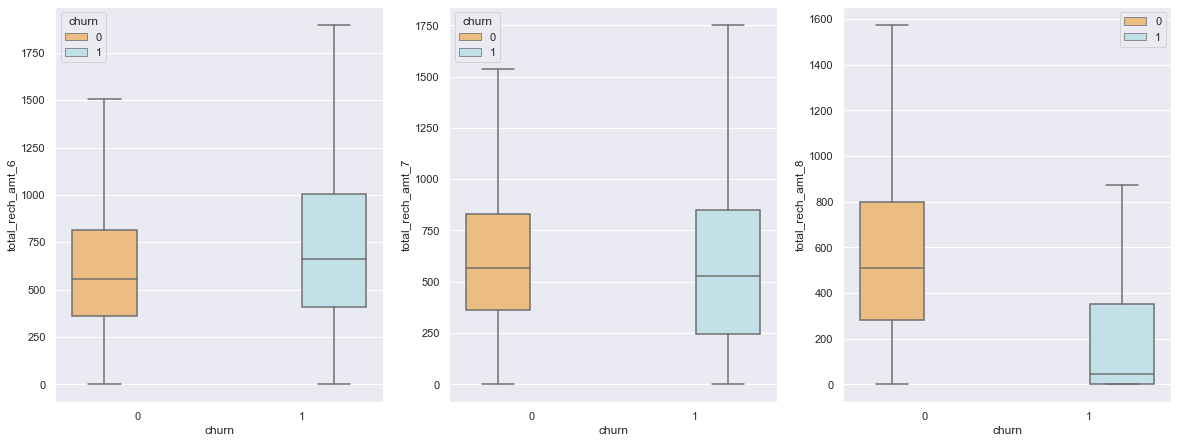

In [27]:
# Plotting for total recharge amount
plot_box_chart('total_rech_amt')

**Observations**: There is a drop in the total recharge amount for churned customers in the 8th Month (Action Phase)

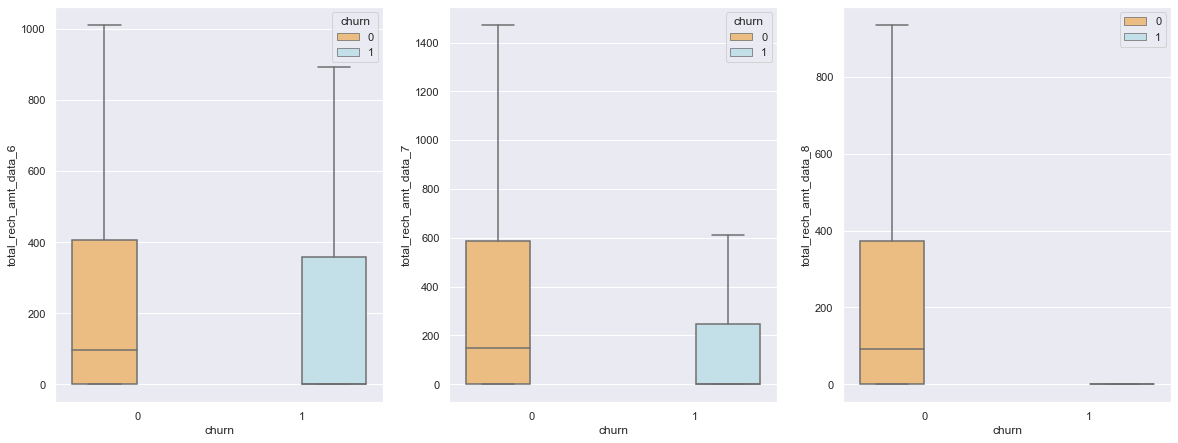

In [28]:
# Plotting for total recharge amount for data
plot_box_chart('total_rech_amt_data')

**Observations**: There is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

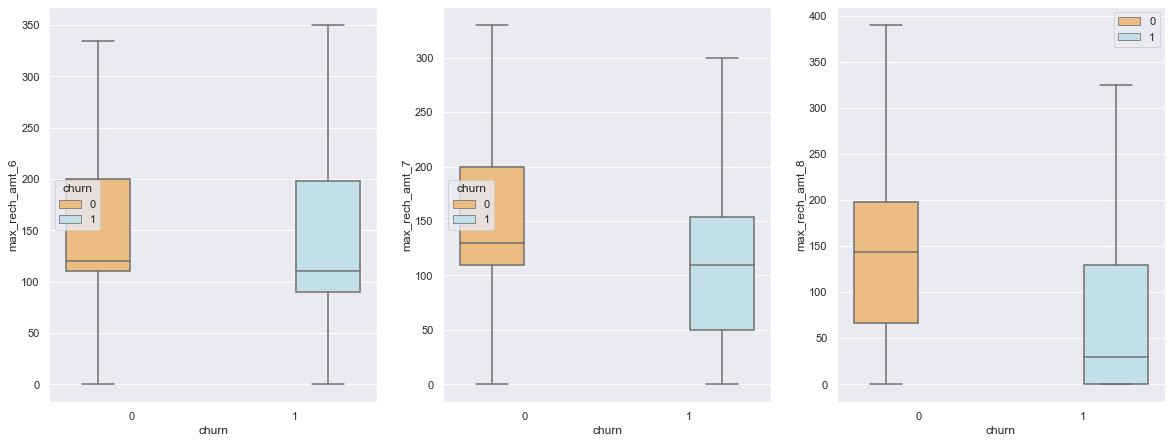

In [29]:
# Plotting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

**Observations**: There is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [30]:
# Check remaining missing values
missing_value(tel_filtered, 0.0000)

,percent_missing
date_of_last_rech_data_8,46.799987
fb_user_8,46.799987
count_rech_2g_8,46.799987
count_rech_3g_8,46.799987
night_pck_user_8,46.799987
max_rech_data_8,46.799987
arpu_2g_8,46.799987
arpu_3g_8,46.799987
night_pck_user_6,44.112443
count_rech_2g_6,44.112443


In [31]:
# Checking other recharge related variables : NaN values
other_recharge = tel_filtered.columns[tel_filtered.columns.str.contains('rech_num|max_rech_data',regex=True)]
missing_df = missing_value(tel_filtered[other_recharge], 0.0000)
missing_df

,percent_missing
max_rech_data_8,46.799987
max_rech_data_6,44.112443
max_rech_data_7,43.117551


In [32]:
# Summary of other recharge related attributes
tel_filtered.loc[:,missing_df.index].describe()

,max_rech_data_8,max_rech_data_6,max_rech_data_7
count,15935.000000,16740.000000,17038.000000
mean,136.353373,139.804002,140.444712
std,119.571138,118.892926,120.295284
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


**Observations:** The minimum value is `1` while the max is `1555` across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by `0` , means no recharge.

In [33]:
# Replacing 'NaN' values with '0'
tel_filtered.loc[:,missing_df.index] \
= tel_filtered.loc[:,missing_df.index].replace(np.nan,0)

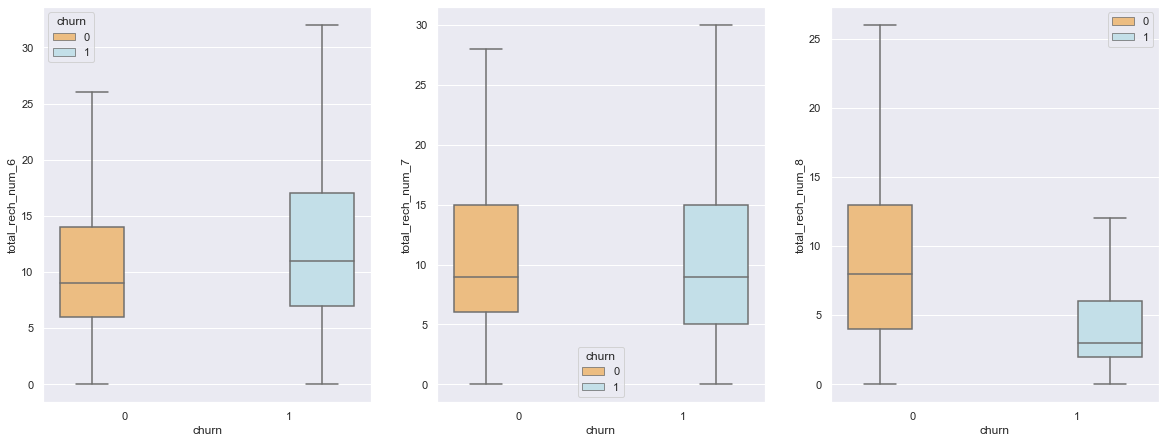

In [34]:
# Plotting for Total recharge for Number
plot_box_chart('total_rech_num')

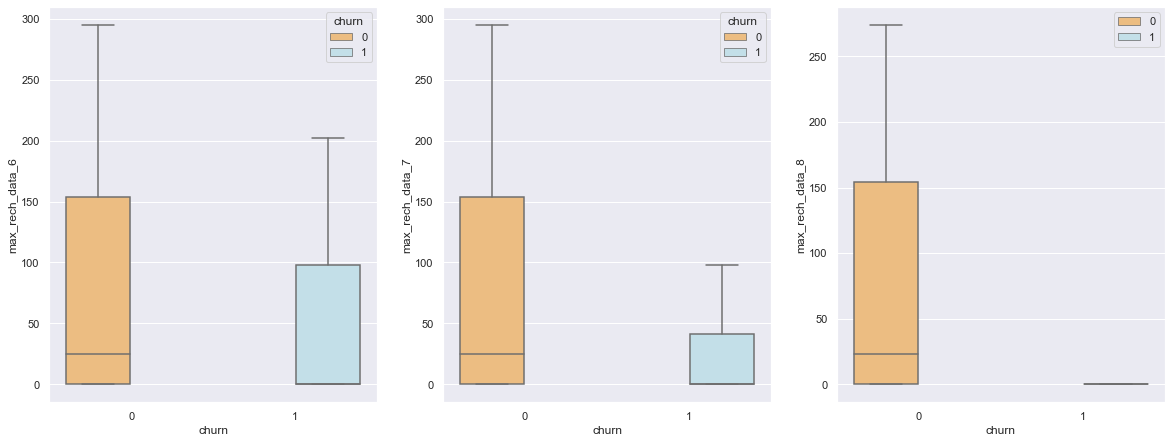

In [35]:
# Plotting for maximum recharge for data:
plot_box_chart('max_rech_data')

**Obsrevations:** 
- There is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.
- There is a huge drop in maximum recharge number also in the 8th month (action phase) for churned customers.

In [36]:
# Getting the last day recharge amount columns
last_day_rech_amt = tel_filtered.columns[tel_filtered.columns.str.contains('day')]
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

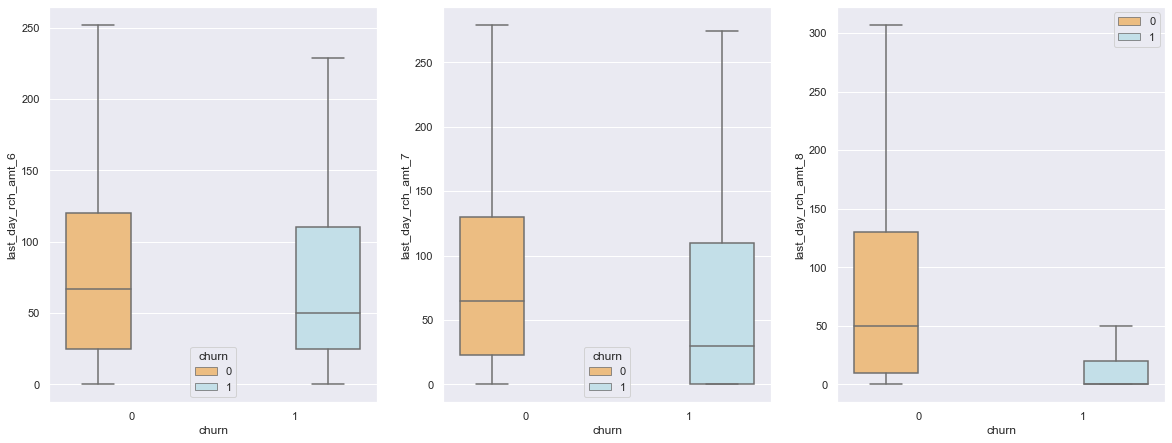

In [37]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

**Analysis:** We are getting a huge drop in 8th month recharge amount for churned customers.

##### Columns related 2G and 3G usage

In [38]:
# let us check the % of NA values present
usage_2g_and_3g = tel_filtered.columns[tel_filtered.columns.str.contains('2g|3g',regex=True)]
missing_value(tel_filtered[usage_2g_and_3g], 0.0000)

,percent_missing
arpu_2g_8,46.799987
count_rech_2g_8,46.799987
arpu_3g_8,46.799987
count_rech_3g_8,46.799987
arpu_3g_6,44.112443
arpu_2g_6,44.112443
count_rech_2g_6,44.112443
count_rech_3g_6,44.112443
arpu_3g_7,43.117551
count_rech_3g_7,43.117551


**Observations:** 
- More then `40%` values are not available for count of recharge and average revenue for 2G/3G per user. As 2G/3G volume usage based data available, we can drop these columns.

In [39]:
tel_filtered.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

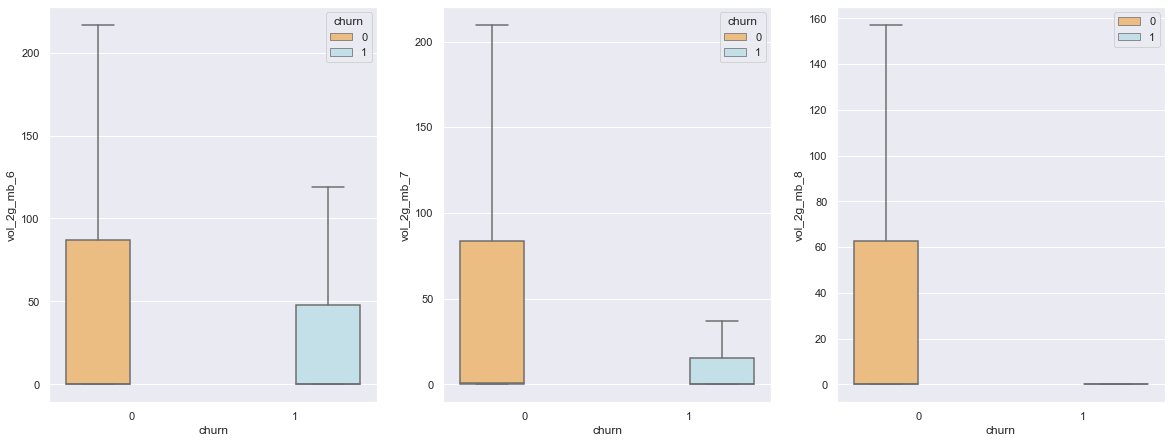

In [40]:
# Plotting for volume of 2G usage
plot_box_chart('vol_2g_mb')

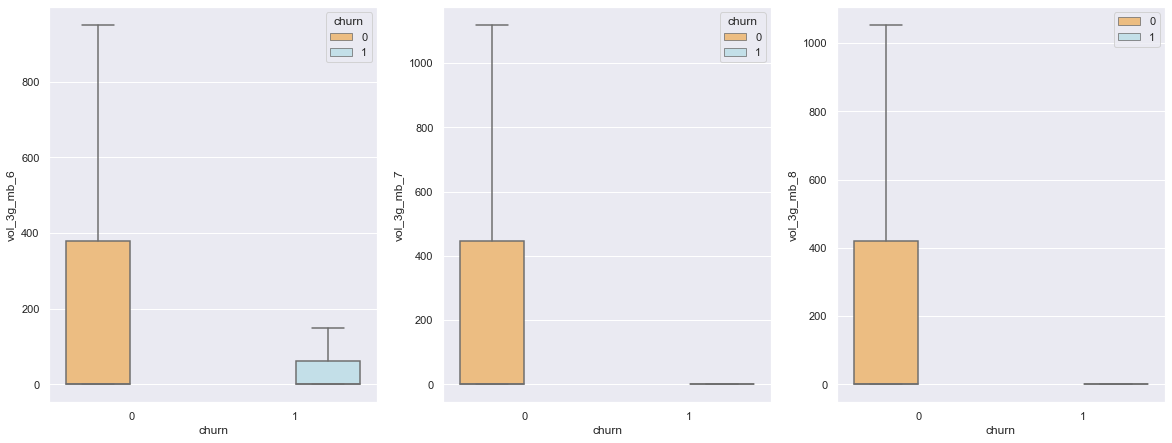

In [41]:
# Plotting for volume of 3G usage
plot_box_chart('vol_3g_mb')

**Observations:**  
- `2G` and `3G` usage for churned customers drops in 8th month.
- `2G/3G` usage is higher for non-churned customers indicating that churned customers might be from areas where `2G/3G` service is not properly available.

In [42]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = tel_filtered.columns[tel_filtered.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [43]:
missing_value(tel_filtered[monthly_subcription_2g_3g], 0.0000)

,percent_missing


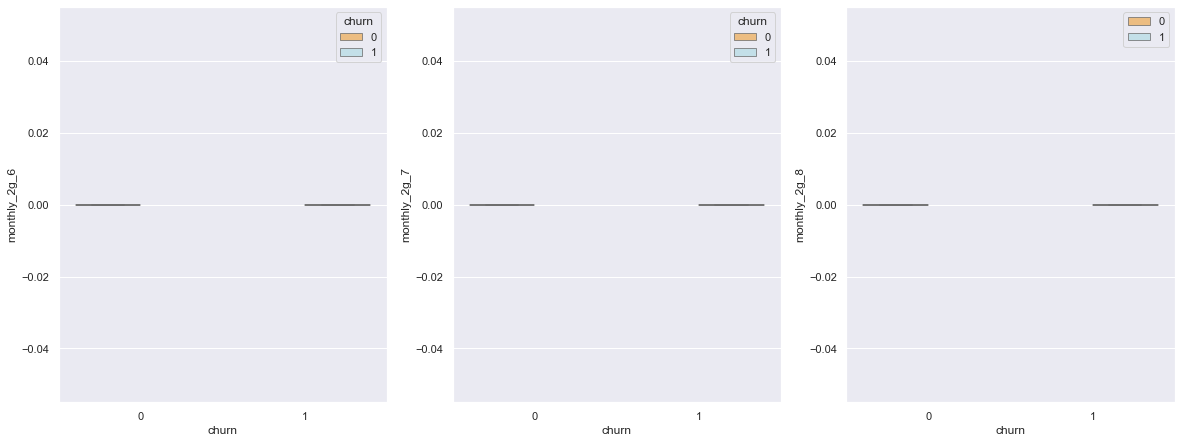

In [44]:
# Plotting for monthly subscription
plot_box_chart('monthly_2g')

**Observations:** Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [45]:
def plot_mean_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

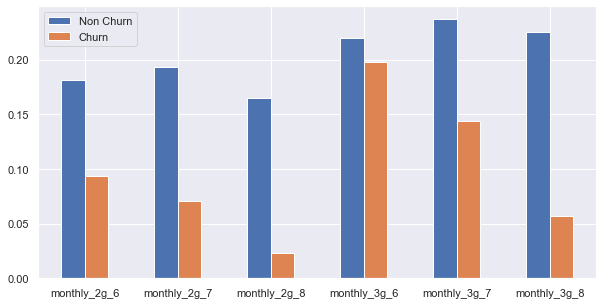

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [46]:
# Plotting mean values in bar chart
plot_mean_chart(tel_filtered, monthly_subcription_2g_3g)

**Observations:** There is a drop in monthly subscription for churned customers in 8th Month.

In [47]:
# let's check Volume based cost 
vbc_column = tel_filtered.columns[tel_filtered.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [48]:
# Renaming month named vbc columns to 6,7,8,9 format
tel_filtered.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
tel_filtered.drop('vbc_3g_9',axis=1,inplace=True)

In [49]:
vbc_column = tel_filtered.columns[tel_filtered.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

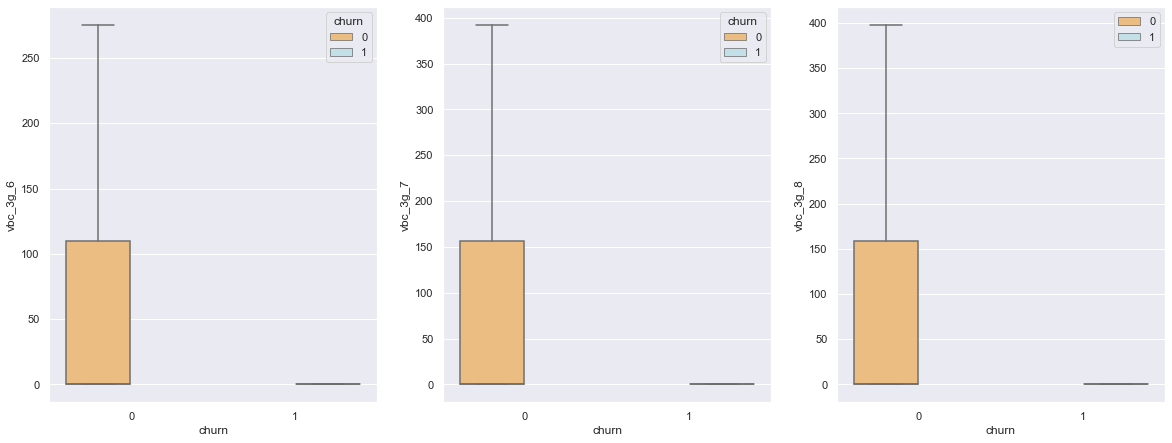

In [50]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

In [51]:
plot_mean_bar_chart(tel_filtered, vbc_column)

NameError: name 'plot_mean_bar_chart' is not defined

**Observations:** Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [ ]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = tel_filtered.columns[tel_filtered.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


In [ ]:
plot_mean_bar_chart(tel_filtered, SC_2g_or_3g_col)

**Observations:** We can see the drop in sachet services in 8th month for churned cutsomers

##### Columns related Average Revenue Per User

In [ ]:
# Checking columns for average revenue per user
arpu_cols = tel_filtered.columns[tel_filtered.columns.str.contains('arpu_')]

# Plotting arpu
plot_box_chart('arpu')

In [ ]:
plot_mean_chart(tel_filtered, arpu_cols)

**Observations:** We can see that huge drops for Arpu in 8th month for churned customers

##### Columns related to Minutes of usage - voice calls

In [ ]:
mou_cols = tel_filtered.columns[tel_filtered.columns.str.contains('mou')]
mou_cols

In [ ]:
missing_value(tel_filtered[mou_cols], 0.0000)

**Observations:** So for all minutes of usage columns the maximum missing % is `3.91` , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with `0`

In [ ]:
# replacing null values by 0 for minutes of usage variables
tel_filtered.loc[:,mou_cols] = tel_filtered.loc[:,mou_cols].replace(np.NaN,0)

In [ ]:
mou_og_cols6 = tel_filtered.columns[tel_filtered.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [ ]:
tel_filtered.loc[:,mou_og_cols6].describe()

**Observations:** As per data dictionary total_og_mou_6, std_og_mou_6 and loc_og_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set.

In [ ]:
list_total_og_cols = tel_filtered.columns[tel_filtered.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
tel_filtered.drop(list_total_og_cols,axis=1,inplace=True)
list_total_og_cols.tolist()

##### Columns related to  incoming mou variables

In [ ]:
mou_ic_cols6 = tel_filtered.columns[tel_filtered.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [ ]:
tel_filtered.loc[:,mou_ic_cols6].describe()

**Analysis:** We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 is a combination of other variables present in dataset.So we can remove these columns for all months from the data set

In [ ]:
list_total_ic_cols = tel_filtered.columns[tel_filtered.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
tel_filtered.drop(list_total_ic_cols,axis=1,inplace=True)
list_total_ic_cols.tolist()

##### Columns related to Offnet

In [ ]:
offnet_usage_service_col = tel_filtered.columns[tel_filtered.columns.str.contains('offnet.*mou',regex=True)]

In [ ]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

In [ ]:
plot_mean_chart(tel_filtered, offnet_usage_service_col)

**Observations:** We can see the drop for offnet mou services in the 8th month

##### Columns related to ONNET

In [ ]:
#minutes of usage related columns
onnet_usage_service =  tel_filtered.columns[tel_filtered.columns.str.contains('^onnet.*mou',regex=True)]

In [ ]:
#Printing minutes of usage related columns
onnet_usage_service

In [ ]:
# Plotting offnet
plot_box_chart('onnet_mou')

In [ ]:
plot_mean_chart(tel_filtered, onnet_usage_service)

**Observations:** We also see that there is a drop in Onnet usage in the 8th month for churned customers

##### Tenure Analysis

In [ ]:
tenure_data = tel_filtered.copy()

In [ ]:
plt.figure(figsize=(14,8))
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [ ]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

In [ ]:
missing_value(tenure_data, 30.0)

In [ ]:
# Dropping columns with more than 30% missing values
tel_filtered.drop(tenure_data[missing_value(tel_filtered, 30.0).index],axis=1,inplace=True)

In [ ]:
missing_value(tenure_data, 0.0000)

In [ ]:
numberic_cols = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

- Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis

In [ ]:
for i in numberic_cols:
    tel_filtered.loc[tel_filtered[i].isnull(),i]=0

In [ ]:
missing_value(tel_filtered, 0.0000)

#### Derive new features.

In [ ]:
final_df = tel_filtered.copy()
print(final_df.shape)
final_df.head(3)

In [ ]:
final_df.drop(["total_avg_rech_amnt_6_7"],axis=1,inplace=True)
final_df.drop(tel_filtered.filter(regex='date_').columns,axis=1,inplace=True)
print (final_df.shape)

col_list = final_df.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    final_df[avg_col_name] = (final_df[col_6]  + final_df[col_7])/ 2

In [ ]:
col_list_to_drop = final_df.filter(regex='_6|_7')
final_df.drop(col_list_to_drop,axis=1,inplace=True)
print (final_df.shape)

**Observations:** We have merged most of the columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 81.  

#### Multicollinearity Check

In [ ]:
# Correlation Matrix - Upper Triangle
cor_matrix = final_df.corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

In [ ]:
# Plotting Heatmap of Correlation Matrix - Upper Triangle
plt.figure(figsize=(100,100))
sns.heatmap(upper_tri, annot=True, cmap='RdYlGn')
plt.show()

**Observations** : From correlation matrix heatmap - we can observe there are some attributes which have high correlation. So, we need to use regularisation methods.

## Model Building & Evaluation

### PCA

In [ ]:
# Making a copy of original dataframe
final_df_pca = final_df.copy()

In [ ]:
# Method for splitting X and y variables
def split_XY(df):
    y = df["churn"]
    X = df.drop(["churn","mobile_number"],axis=1)
    return X,y

In [ ]:
# Method for scaling independent variable
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X.columns)
    return X_scale_final

In [ ]:
# Method for creating a scree plot
def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=100)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [ ]:
# Method for Train-Test Split
def train_test_data(X,y):
    return train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Method for Applying PCA
def pca_data(X,y,feature_number) :
    X_train, X_test, y_train, y_test = train_test_data(X,y)
    
    pca = IncrementalPCA(n_components=feature_number)    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    return X_train_pca,X_test_pca,y_train,y_test

In [ ]:
# Method for Resampling Data
def resampling_data(df):
    X,y = split_XY(df)
    return pca_data(scale_data(X),y,60)

In [ ]:
# Split X & y
X,y=split_XY(final_df_pca)

In [ ]:
# Scale Independent Attributes
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

In [ ]:
# Plotting Scree Plot
pca = get_scree_plot(X_scaled)

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

In [ ]:
# Get Variance Ratio
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

**Observations** : `60` components are enough to describe almost `98%` of the variance in tha dataset. 

In [ ]:
# Apply PCA and Split Train-Test Set
X_train, X_test, y_train, y_test = pca_data(X_scaled,y,60)
print("X_Train Shape : ", X_train.shape)
print("X_Test Shape : ", X_test.shape)

### Logistic Regression Model

In [ ]:
# Simple Logistic Regression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
y_pred_lr = model.predict_proba(X_test)[:,1]
print("Logistic Regression Accuracy : "+"{:2.2}".format(roc_auc_score(y_test, y_pred_lr)))

### SVM Regression Model

In [ ]:
# Train-Test Split
final_svm_df = final_df.copy()
X_train, X_test, y_train, y_test = resampling_data(final_svm_df)

In [ ]:
# Build default SVM model - linear kernel
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
print("SVM(Default) Linear Regression Accuracy : "+"{:2.2}".format(accuracy_score(y_test, y_pred_svm)))

In [ ]:
# Update model score in dataframe
results = pd.DataFrame({
    "Model":["SVM Linear-Kernel"],
    "Accuracy":[round(accuracy_score(y_test,y_pred_svm),2)],
    "Recall":[round(recall_score(y_test,y_pred_svm),2)],
    "Precision":[round(precision_score(y_test,y_pred_svm),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred_svm),2)]
})
results = results[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results

In [ ]:
# Build default SVM model - linear rbf
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)
print("SVM(Default) Accuracy : "+"{:2.2}".format(accuracy_score(y_test, y_pred_svm)))

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["SVM RBF-Kernel"],
    "Accuracy":[round(accuracy_score(y_test,y_pred_svm),2)],
    "Recall":[round(recall_score(y_test,y_pred_svm),2)],
    "Precision":[round(precision_score(y_test,y_pred_svm),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred_svm),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

In [ ]:
# Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}]

model = SVC(kernel="rbf")
model_cv_svm = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

model_cv_svm.fit(X_train, y_train)

In [ ]:
# cv results
svm_cv_results = pd.DataFrame(model_cv_svm.cv_results_)
svm_cv_results['param_C'] = svm_cv_results['param_C'].astype('int')
gammas=[0.1,0.01, 0.001, 0.0001]

for i in gammas:
    plt.figure(figsize=(16,5))
    gamma = svm_cv_results[svm_cv_results['param_gamma']==i]
    plt.plot(gamma["param_C"], gamma["mean_test_score"])
    plt.plot(gamma["param_C"], gamma["mean_train_score"])
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.title("Gamma="+str(i))
    plt.ylim([0.60, 1])
    plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
    plt.xscale('log') 

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_svm.best_score_
best_hyperparams = model_cv_svm.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(round(best_score,2), best_hyperparams))

In [ ]:
# model with optimal hyperparameters
final_svm_model = SVC(C=10, gamma=0.1, kernel="rbf")

final_svm_model.fit(X_train, y_train)
y_pred = final_svm_model.predict(X_test)

# metrics
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["SVM RBF (Best Hyper Param)"],
    "Accuracy":[round(accuracy_score(y_test,y_pred),2)],
    "Recall":[round(recall_score(y_test,y_pred),2)],
    "Precision":[round(precision_score(y_test,y_pred),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

### Tree Models

In [ ]:
# Train-Test Split for Tree Model
tree_final_df = final_df.copy()
X_train, X_test, y_train, y_test = resampling_data(tree_final_df)

In [ ]:
# Model Building
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["RandomForest (Default)"],
    "Accuracy":[round(accuracy_score(y_test,y_pred),2)],
    "Recall":[round(recall_score(y_test,y_pred),2)],
    "Precision":[round(precision_score(y_test,y_pred),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

#### Hyperparameter Tuning

In [ ]:
# Method for Hyper parameter tuning
def tune_tree_hyper(parameters,X_train,y_train,max_depth = 0,n_folds = 5):
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(X_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [ ]:
# Parameters to build the model on - 'max_depth'
parameters = {'max_depth': range(2, 40, 5)}
tune_tree_hyper(parameters,X_train,y_train)

In [ ]:
# Parameters to build the model on - 'n_estimators'
parameters = {'n_estimators': range(100, 2000, 200)}
tune_tree_hyper(parameters,X_train,y_train)

In [ ]:
# Parameters to build the model on - 'max_features'
parameters = {'max_features': [20,30,40,50,60]}
tune_tree_hyper(parameters,X_train,y_train,4)

In [ ]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_tree_hyper(parameters,X_train,y_train)

In [ ]:
# parameters to build the model on - 'min_samples_split'
parameters = {'min_samples_split': range(10, 100, 10)}
tune_tree_hyper(parameters,X_train,y_train)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,18],
    'n_estimators': [200],
    'max_features': [60],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [ ]:
# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

In [ ]:
# Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))
print("Max accuracy with Random Forest classifier - "+str(round(rf_grid_search.best_score_,2)))

In [ ]:
# Building Random Forest Classification Model
rfc = RandomForestClassifier(max_depth=18,
                             max_features=60,
                             min_samples_leaf=10,
                             min_samples_split=20,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(X_train,y_train)

In [ ]:
# Making predictions
y_pred = rfc.predict(X_test)

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["RandomForest (Best Hyper Param)"],
    "Accuracy":[round(accuracy_score(y_test,y_pred),2)],
    "Recall":[round(recall_score(y_test,y_pred),2)],
    "Precision":[round(precision_score(y_test,y_pred),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

### XGBoost

In [ ]:
# XGBoost Train-Test Split
final_df_xgb = final_df.copy()
X_train, X_test, y_train, y_test = resampling_data(final_df_xgb)

In [ ]:
# Fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
# Evaluate predictions
y_pred = model.predict(X_test)

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["XGBoost"],
    "Accuracy":[round(accuracy_score(y_test,y_pred),2)],
    "Recall":[round(recall_score(y_test,y_pred),2)],
    "Precision":[round(precision_score(y_test,y_pred),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

In [ ]:
# Hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)

In [ ]:
# Fit the model
model_cv.fit(X_train, y_train)       

In [ ]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [ ]:
# Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

In [ ]:
def plot_for_xboost(param_grid,cv_results):
    plt.figure(figsize=(18,5))
    for n, subsample in enumerate(param_grid['subsample']):
        # subplot 1/n
        plt.subplot(1,len(param_grid['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df["param_learning_rate"], df["mean_test_score"])
        plt.plot(df["param_learning_rate"], df["mean_train_score"])
        plt.xlabel('learning_rate')
        plt.ylabel('AUC')
        plt.title("subsample={0}".format(subsample))
        plt.ylim([0.60, 1])
        plt.legend(['test score', 'train score'], loc='right left')
        plt.xscale('log')

In [ ]:
param_grid1 = {'learning_rate': [0.1,0.2,0.3], 'subsample': [0.3,0.4,0.5]}  
plot_for_xboost(param_grid1,cv_results_xboost)

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.3,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.5,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params,max_depth=2, n_estimators=200)
model.fit(X_train, y_train)

In [ ]:
# predict
y_pred = model.predict(X_test)

In [ ]:
# Update model score in dataframe
tempResults = pd.DataFrame({
    "Model":["XGBoost (Hyper Param)"],
    "Accuracy":[round(accuracy_score(y_test,y_pred),2)],
    "Recall":[round(recall_score(y_test,y_pred),2)],
    "Precision":[round(precision_score(y_test,y_pred),2)],
    "AUC" : [round(roc_auc_score(y_test,y_pred),2)]
})
tempResults = tempResults[['Model', 'Accuracy', 'Recall', 'Precision', 'AUC']]
results = pd.concat([results, tempResults])
results

In [ ]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [ ]:
print("Important features ...")
plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()


col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)

## Recommendations

Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

Customers with less than **5 years** of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group. 

**Average revenue per user** seems to be most important feature in determining churn prediction.

**Incoming** and **Outgoing Calls** on **romaing** for 8th month are strong indicators of churn behaviour

**Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.  

Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.